## Topic: Titanic Data Analysis

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df['Age'].max())
print(df['Age'].min())

80.0
0.42


### Printing histogram of various people

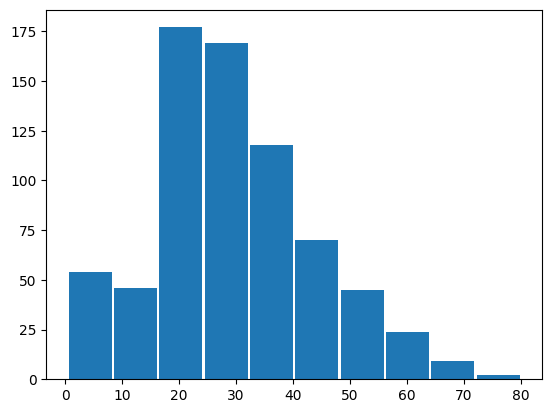

In [4]:
plt.hist(df['Age'],bins=10,rwidth=0.95)
plt.show()

### Using pie chart visualize the percentage of male and female passanges

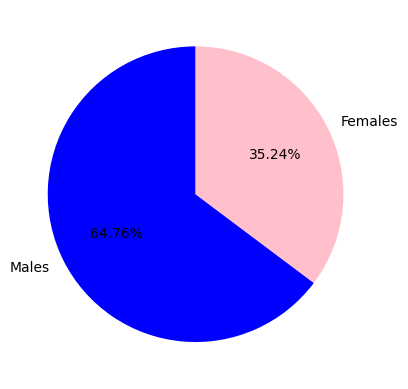

In [5]:
no_males = df['Sex'].value_counts()['male']
no_females = df['Sex'].value_counts()['female']

plt.pie([no_males,no_females], labels=['Males','Females'], colors=['blue','pink'], autopct='%1.2f%%', startangle=90)
plt.show()

### Making Bar chart of 'Embarked' feature

In [6]:
print(df['Embarked'].unique())
s = df['Embarked'].value_counts()['S']
print(s)
c = df['Embarked'].value_counts()['C']
print(c)
q = df['Embarked'].value_counts()['Q']
print(q)

['S' 'C' 'Q' nan]
644
168
77


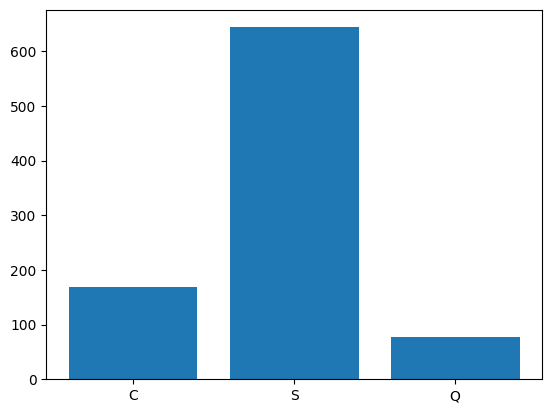

In [7]:
count = [c,s,q]
label = ['C','S','Q']
plt.bar(label, count)
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


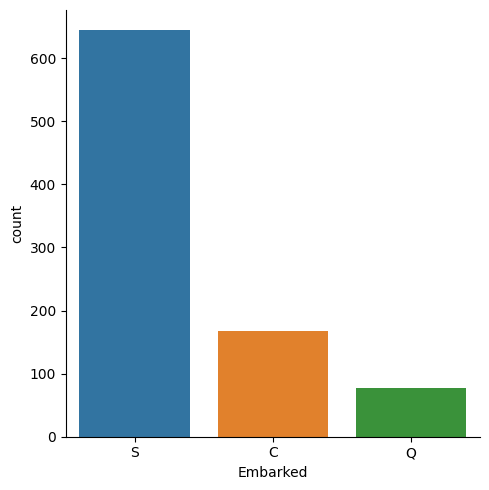

In [8]:
sns.catplot(x='Embarked',data=df, kind = 'count')

### Seperating the genders by survived and died and plotting grouped bar chart and stacked bar chart

In [9]:
survived = df[df['Survived']==1]['Sex'].value_counts()
print('Survived\n',survived)
dead = df[df['Survived']==0]['Sex'].value_counts()
print('Dead\n',dead)

Survived
 Sex
female    233
male      109
Name: count, dtype: int64
Dead
 Sex
male      468
female     81
Name: count, dtype: int64


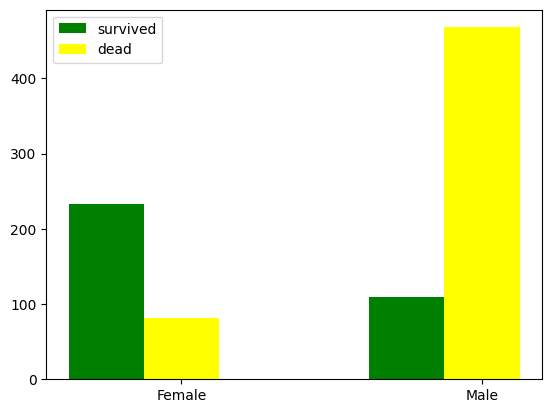

In [10]:
barWidth = 0.25

bar1 = [survived[0],survived[1]]
bar2 = [dead[1],dead[0]]

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bar1, color='green', width=barWidth, label='survived')
plt.bar(r2, bar2, color='yellow', width=barWidth, label='dead')
plt.legend()

plt.xticks([r + barWidth for r in range(len(bar1))], ['Female','Male'])

plt.show()

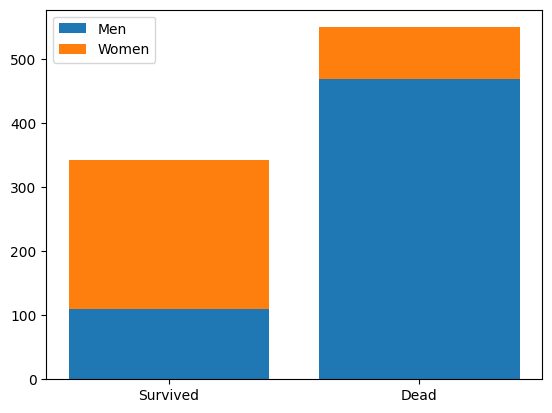

In [11]:
x = np.arange(2)
women = [survived[0], dead[1]]
men = [survived[1], dead[0]]
p1 = plt.bar(x, men)
p2 = plt.bar(x, women, bottom=men)
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.xticks(x, ('Survived','Dead'))
plt.show()